In [3]:
import pandas as pd
import numpy as np

In [211]:
results2=pd.read_csv("data/2022-02-18-TeraTox-commercial-phenoData.txt",delimiter='\t')
results=results2['Teratogenicity']
result=np.array([results=='Positive']).reshape(-1,6).any(axis=1).astype(int)
print(result.shape)
y=result.reshape(-1,1)
y=result
compound_names=results2[results2.index % 6 == 0]['Compound_Name'].to_list() 


(36,)


In [6]:
pd.read_csv("data/2022-02-18-TeraTox-commercial-featureData.txt",delimiter='\t')

,Unnamed: 0,FeatureName,Transcript,Amplicon,GeneID,GeneSymbol,AmpliconSize,IsGeneCard
0,SULT1C2,NM_176825,NM_176825,AMPL17111663,6819,SULT1C2,106,False
1,CYP1B1,NM_000104,NM_000104,AMPL1643513,1545,CYP1B1,110,False
2,RARB,NM_000965,NM_000965,AMPL3877085,5915,RARB,108,False
3,TREX1,NM_016381,NM_016381,AMPL31797718,11277,TREX1,109,False
4,HOPX,NM_139211,NM_139211,AMPL34269818,84525,HOPX,108,True
...,...,...,...,...,...,...,...,...
1210,TRPM8,NM_024080,NM_024080,AMPL35373412,79054,TRPM8,103,True
1211,SCN4A,NM_000334,NM_000334,AMPL1730502,6329,SCN4A,107,False
1212,CYP7B1,NM_004820,NM_004820,AMPL29595948,9420,CYP7B1,102,False
1213,GSTP1,NM_000852,NM_000852,AMPL4426508,2950,GSTP1,107,False


In [229]:
logfc=pd.read_csv("data/2022-02-18-TeraTox-commercial-logFC.gct",skiprows=range(0,1),delimiter='\t',header=1)
log_fc=logfc.iloc[:,2:].to_numpy().reshape(1215,36,6)
log_fc.shape
log_fc=stats.zscore(log_fc,axis=0)

In [12]:
# pd.read_csv("data/GSE183534_FactorAnalysis-DGEList.gct",skiprows=range(0,1),delimiter='\t')

In [52]:

from scipy.stats import norm
pscore=pd.read_csv("data/2022-02-18-TeraTox-commercial-pScore.gct",skiprows=range(0,1),delimiter='\t',header=1)
# print(pscore.iloc[:,2:].to_numpy().shape())

pvalues=pscore.iloc[:,2:].to_numpy().reshape(1215,36,6)
z_scores=norm.cdf(pvalues)


In [14]:
def data_prep(data):
    for i in data.head():
        print(i)
  
    

NameError: name 'logfc' is not defined

In [245]:
from scipy import stats
stats.zscore
print(z_scores.shape,log_fc.shape)
inputs=z_scores*-log_fc
inputs.reshape(1215,-1)
X=inputs.T
X=stats.zscore(inputs,axis=1)
X=np.transpose(X,(1,0,2)).reshape(36,-1)
# print(X.shape)
# X=stats.zscore(log_fc.reshape(1215,36,6),axis=0)
# print(X.shape)
# X=np.transpose(X,(1,0,2)).reshape(36,-1)
# X=np.concatenate([np.mean(np.transpose(log_fc,(1,0,2)),axis=2),np.std(np.transpose(log_fc,(1,0,2)),axis=2)],axis=0)
print(X.shape)
# print(Y)


(1215, 36, 6) (1215, 36, 6)
(36, 7290)


In [258]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
# X=np.mean(log_fc,axis=2).T
kf=KFold(n_splits=5, random_state=False, shuffle=True)
from sklearn.metrics import precision_score, accuracy_score,f1_score
overall_acc=[]
overall_f1=[]
for i, (train_index, test_index) in enumerate(kf.split(result.reshape(-1,1))):
    neigh = KNeighborsClassifier(n_neighbors=1)#,metric='cosine')
    x_train=finger[train_index]
    y_train=y[train_index]
    x_test=finger[test_index]
    y_test=y[test_index]
    neigh.fit(x_train, y_train)
    prediction=neigh.predict(x_test)
    acc=accuracy_score(prediction,y_test)
    overall_acc.append(acc)
    f1=f1_score(prediction,y_test)
    print(f"Fold {i}:")
    print(f1, acc)
    overall_f1.append(f1)
#     print(y_test)
    
print(np.mean(overall_acc),np.std(overall_acc),np.mean(overall_f1),np.std(overall_f1))
    


Fold 0:
0.3333333333333333 0.5
Fold 1:
0.8000000000000002 0.7142857142857143
Fold 2:
0.7272727272727272 0.5714285714285714
Fold 3:
0.8 0.7142857142857143
Fold 4:
1.0 1.0
0.7 0.17142857142857143 0.7321212121212122 0.2191024348366113


In [212]:
import pubchempy as pcp

# List of drug names


# Open a file to write the results
with open("smiles_output.csv", "w") as f:
    f.write("DRUGNAME,SMILES\n")  # Write header

    for drug_name in compound_names:
        # Search for the compound by name
        compounds = pcp.get_compounds(drug_name, 'name')
        
        if compounds:
            compound = compounds[0]
            smiles = compound.isomeric_smiles
            
            print((f"{drug_name},{smiles}\n"))
            
            f.write(f"{drug_name},{smiles}\n")
        else:
            f.write(f"{drug_name},NOT FOUND\n")

print("SMILES extraction completed.")

Amoxycillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H](C3=CC=C(C=C3)O)N)C(=O)O)C

Artesunate,C[C@@H]1CC[C@H]2[C@H]([C@@H](O[C@H]3[C@@]24[C@H]1CC[C@](O3)(OO4)C)OC(=O)CCC(=O)O)C

Ascorbic acid,C([C@@H]([C@@H]1C(=C(C(=O)O1)O)O)O)O

Bosentan,CC(C)(C)C1=CC=C(C=C1)S(=O)(=O)NC2=C(C(=NC(=N2)C3=NC=CC=N3)OCCO)OC4=CC=CC=C4OC

Busulfan,CS(=O)(=O)OCCCCOS(=O)(=O)C

Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N

Cetirizine,C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl

Cyclopamine,C[C@H]1C[C@@H]2[C@H]([C@H]([C@]3(O2)CC[C@H]4[C@@H]5CC=C6C[C@H](CC[C@@]6([C@H]5CC4=C3C)C)O)C)NC1

Cyproheptadine,CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1

Dabrafenib,CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=C3)NS(=O)(=O)C4=C(C=CC=C4F)F)F

DAPT,C[C@@H](C(=O)N[C@@H](C1=CC=CC=C1)C(=O)OC(C)(C)C)NC(=O)CC2=CC(=CC(=C2)F)F

Dasatinib,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(=N3)C)N4CCN(CC4)CCO

Dexamethasone,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@@]4([C@]3([C@H](C[C@@]2([C@]1(C(=O)CO)O)C)O)F)C

Dorsomorphin,C1

In [213]:
smiles=pd.read_csv("smiles_output.csv")
smiles.insert(2, "Teratogenecity", y, True)

In [214]:
for a in smiles['Smils']

,DRUGNAME,SMILES,Teratogenecity
0,Amoxycillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,0
1,Artesunate,C[C@@H]1CC[C@H]2[C@H]([C@@H](O[C@H]3[C@@]24[C@...,1
2,Ascorbic acid,C([C@@H]([C@@H]1C(=C(C(=O)O1)O)O)O)O,0
3,Bosentan,CC(C)(C)C1=CC=C(C=C1)S(=O)(=O)NC2=C(C(=NC(=N2)...,1
4,Busulfan,CS(=O)(=O)OCCCCOS(=O)(=O)C,1
5,Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,1
6,Cetirizine,C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl,0
7,Cyclopamine,C[C@H]1C[C@@H]2[C@H]([C@H]([C@]3(O2)CC[C@H]4[C...,1
8,Cyproheptadine,CN1CCC(=C2C3=CC=CC=C3C=CC4=CC=CC=C42)CC1,0
9,Dabrafenib,CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=...,1


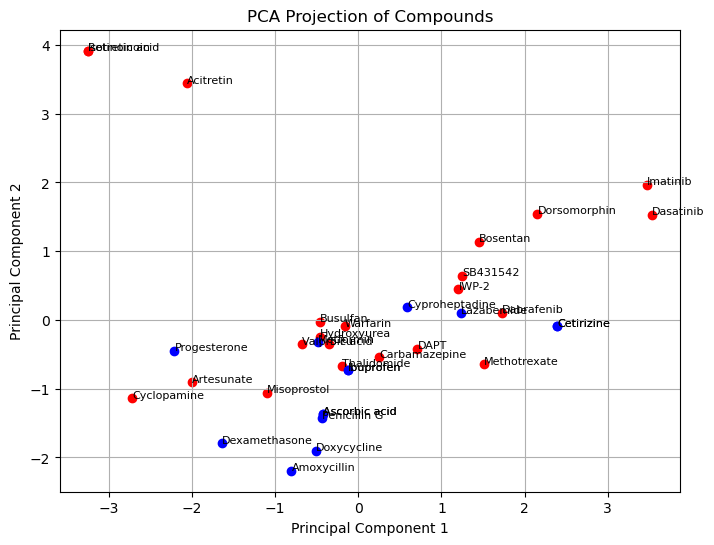

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA

def generate_pca_plot(smiles_list, labels, drugname, num_components=2):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    
    # Calculate ECFP fingerprints
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]
    fingerprints = np.array([list(fp) for fp in fingerprints])
    
    # Perform PCA
    pca = PCA(n_components=num_components)
    projected = pca.fit_transform(fingerprints)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        color = 'red' if label == 1 else 'blue'
        plt.scatter(projected[i, 0], projected[i, 1], c=color, marker='o', label=f'Label {label}')
    
    for i, txt in enumerate(drugname):
        plt.annotate(txt, (projected[i, 0], projected[i, 1]), fontsize=8)
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection of Compounds')
#     plt.legend()
    plt.grid()
    plt.show()
# Example usage
smiles_list = ["CCO", "CCN", "COC", "CCC", "CNC"]
generate_pca_plot(smiles['SMILES'],smiles['Teratogenecity'],smiles['DRUGNAME'])


(36, 7290)

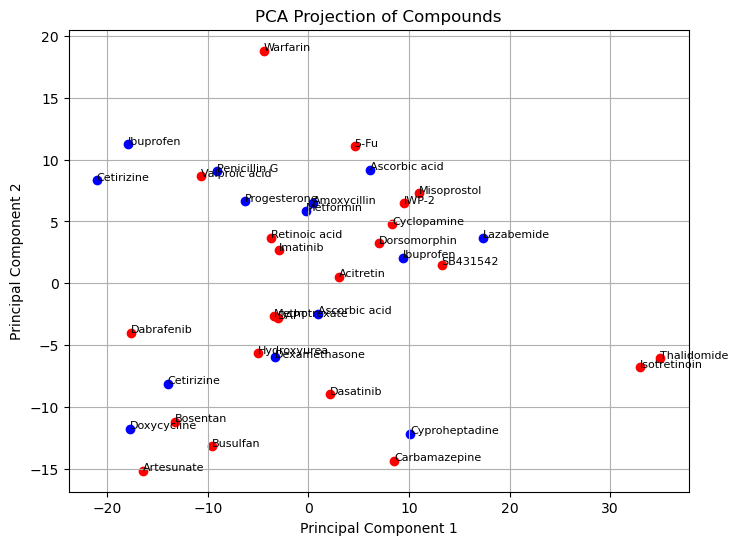

In [253]:
def pca_for_gene_expression(X, labels, drugname, num_components=2):
      
    
    # Perform PCA
    pca = PCA(n_components=num_components)
    projected = pca.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        color = 'red' if label == 1 else 'blue'
        plt.scatter(projected[i, 0], projected[i, 1], c=color, marker='o', label=f'Label {label}')
    
    for i, txt in enumerate(drugname):
        plt.annotate(txt, (projected[i, 0], projected[i, 1]), fontsize=8)
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection of Compounds')
#     plt.legend()
    plt.grid()
    plt.show()
# Example usage

pca_for_gene_expression(np.max(log_fc,axis=2).T-np.min(log_fc,axis=2).T,smiles['Teratogenecity'],smiles['DRUGNAME'])


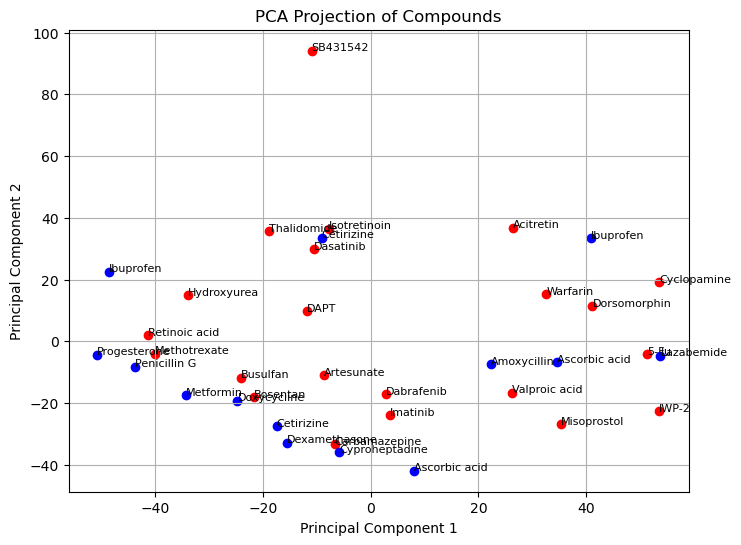

In [254]:
pca_for_gene_expression(X,smiles['Teratogenecity'],smiles['DRUGNAME'])

In [255]:
def fingerprint(smiles_list):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    
    # Calculate ECFP fingerprints
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]
    fingerprints = np.array([list(fp) for fp in fingerprints])
    
    return fingerprints
finger=fingerprint(smiles['SMILES'])